**Ne creăm spațiul de lucru cu simPy**

In [ ]:
!pip install simpy

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt


env = simpy.Environment()

def simple_process(env):
    while True:
        print(f"Time {env.now}: Process is running")
        yield env.timeout(1)

env.process(simple_process(env))

<Process(simple_process) object at 0x7fc0dcd01130>

**Definim clasele pe care le vom utiliza ulterior**

In [ ]:
class Station:
  def __init__(self,env, name, max_capacity, no_of_bikes):
    self.env=env
    self.max_capacity=max_capacity
    self.no_of_bikes=no_of_bikes
    self.name=name
    self.bikes = []

  def is_full(self):
    return self.no_of_bikes>=self.max_capacity
  def is_empty(self):
    return self.no_of_bikes==0

  def add_bike(self, bike):
    if not self.is_full():
      self.bikes.append(bike)
      self.no_of_bikes+=1
    else:
      return

  def remove_bike(self, bike):
    if not self.is_empty():
      if bike in self.bikes:
        self.bikes.remove(bike)
        self.no_of_bikes-=1
      else:
        print(f"Time {self.env.now}: Attempted to remove bike {bike.name} from {self.name}, but it was not found.")
    else:
      return

  def __str__(self):
    return f"{self.name} has {self.no_of_bikes} bikes and {self.max_capacity} bikes max capacity."

class Bicyle:
    def __init__(self, env, name, probOfDefect, isAvailable):
        self.env = env
        self.name = name
        self.probOfDefect = probOfDefect
        self.isAvailable = isAvailable
        self.inMaintenance = False

    def __str__(self):
      return f"{self.name} {self.probOfDefect} {self.isAvailable}."

**Creez 40 de obiecte de tip Bicycle pentru 4 clase Station (cu probability of defect)**

In [ ]:
bicycles = []
for i in range(1, 41):
  bike_name = f"Bike{i}"
  prob_of_defect = 0.0
  isAvailable = random.choice([True, False])
  bicycle = Bicyle(env, bike_name, prob_of_defect,isAvailable)
  bicycles.append(bicycle)


def printBicycles():
  for bike in bicycles:
    print(bike)

In [ ]:
stations = []
for i in range(1,5):
  station=f"Station{i}"
  max_capacity=20
  no_of_bikes=0
  station=Station(env,station,max_capacity,no_of_bikes)
  stations.append(station)

def printStations():
  for station in stations:
    print(station)

**verificăm validitatea obiectelor create anterior**

In [ ]:
for station in stations:
  print(station)

for bike in bicycles:
  print(bike)

Station1 has 0 bikes and 20 bikes max capacity.
Station2 has 0 bikes and 20 bikes max capacity.
Station3 has 0 bikes and 20 bikes max capacity.
Station4 has 0 bikes and 20 bikes max capacity.
Bike1 0.0 False.
Bike2 0.0 True.
Bike3 0.0 True.
Bike4 0.0 True.
Bike5 0.0 False.
Bike6 0.0 True.
Bike7 0.0 True.
Bike8 0.0 False.
Bike9 0.0 False.
Bike10 0.0 False.
Bike11 0.0 False.
Bike12 0.0 True.
Bike13 0.0 False.
Bike14 0.0 False.
Bike15 0.0 False.
Bike16 0.0 False.
Bike17 0.0 True.
Bike18 0.0 False.
Bike19 0.0 False.
Bike20 0.0 False.
Bike21 0.0 True.
Bike22 0.0 False.
Bike23 0.0 False.
Bike24 0.0 False.
Bike25 0.0 True.
Bike26 0.0 False.
Bike27 0.0 True.
Bike28 0.0 True.
Bike29 0.0 False.
Bike30 0.0 False.
Bike31 0.0 True.
Bike32 0.0 False.
Bike33 0.0 True.
Bike34 0.0 False.
Bike35 0.0 True.
Bike36 0.0 False.
Bike37 0.0 False.
Bike38 0.0 True.
Bike39 0.0 True.
Bike40 0.0 True.


**Inserez bicicletele în stații, însă mai înainte resetez cantitatea de biciclete în fiecare stație (pentru diversitate)**

In [ ]:
import numpy as np

def emptyStations():
  for station in stations:
    station.no_of_bikes=0
    station.bikes = []

def reInitBikes():
  for bike in bicycles:
    bike.isAvailable=True
    bike.probOfDefect=0.0

def fillStationsWithBicycles(stations, bicycles):
  for bike in bicycles:
    randomNum = np.random.choice([0,1,2,3])
    station=stations[randomNum]
    if not station.is_full():
      station.add_bike(bike)

printStations()

Station1 has 0 bikes and 20 bikes max capacity.
Station2 has 0 bikes and 20 bikes max capacity.
Station3 has 0 bikes and 20 bikes max capacity.
Station4 has 0 bikes and 20 bikes max capacity.


**Funcția pentru călătoriile cu bicicleta**

In [ ]:
def maintenance(env, bike, maintenance_time):
    bike.inMaintenance = True
    bike.isAvailable = False
    print(f"Time {env.now}: Bike {bike.name} enters maintenance for {maintenance_time} minutes")

    yield env.timeout(maintenance_time)

    bike.isAvailable = True
    bike.inMaintenance = False
    bike.probOfDefect = 0
    print(f"Time {env.now}: Bike {bike.name} finished maintenance and is now available again!")




customers = {'unsatisfied': 0, 'total': 0}

def bike_trip(env, bike, from_station, to_station, trip_duration):
  if random.random() < bike.probOfDefect:
    maintenance_time = random.randint(60, 180)  # 1-3 hours
    env.process(maintenance(env, bike, maintenance_time))
    customers['unsatisfied'] += 1
    customers['total'] += 1
    return


  elif bike in from_station.bikes and bike.isAvailable == True:
    from_station.remove_bike(bike)
    bike.isAvailable = False
    bike.probOfDefect += 0.01
    print(f"Time {env.now}: Bike {bike.name} taken from {from_station.name}")

    yield env.timeout(trip_duration)

    if not to_station.is_full():
        to_station.add_bike(bike)
        bike.isAvailable = True
        print(f"Time {env.now}: Bike {bike.name} returned to {to_station.name}")
        customers['total']+=1
    else:
        print(f"Time {env.now}: No docks available at {to_station.name}, bike {bike.name} could not be returned here.")
        customers['unsatisfied']+=1
        customers['total']+=1
  else:
    print(f"Time {env.now}: Bike {bike.name} was not found at {from_station.name} when trying to start trip.")
    customers['unsatisfied']+=1
    customers['total']+=1

**Generăm călătoriile**

In [ ]:
def generate_trips(env, stations, time_slots, default_prob_matrix):
    while True:
        current_time = env.now
        current_prob_matrix = default_prob_matrix
        for slot in time_slots:
            if slot['start'] <= current_time < slot['end']:
                current_prob_matrix = slot['prob_matrix']
                break

        for (from_station, to_station), prob in current_prob_matrix.items():
            if random.uniform(0, 1) < prob:
                trip_duration = 10

                available_bikes = [bike for bike in from_station.bikes if isinstance(bike, Bicyle) and bike.isAvailable]

                if available_bikes:
                    bike_to_take = random.choice(available_bikes)
                    if isinstance(bike_to_take, Bicyle) and bike_to_take in from_station.bikes and bike_to_take.isAvailable:
                        env.process(bike_trip(env, bike_to_take, from_station, to_station, trip_duration))
                    else:
                         print(f"Time {env.now}: Bike {bike_to_take.name if isinstance(bike_to_take, Bicyle) else bike_to_take} is no longer available at {from_station.name} for a trip to {to_station.name}")
                else:
                    print(f"Time {env.now}: No available bikes at {from_station.name} for a trip to {to_station.name}")

        yield env.timeout(1)


**Simulare**

In [ ]:
env = simpy.Environment()


time_slots = [
    {
        'name': 'morning_start',
        'start': 0,
        'end': 120,
        'prob_matrix': {
            (stations[0], stations[1]): 0.4,
            (stations[1], stations[0]): 0.6,
            (stations[0], stations[2]): 0.2,
            (stations[2], stations[0]): 0.5,
            (stations[1], stations[2]): 0.3,
            (stations[2], stations[1]): 0.4,
            (stations[0], stations[3]): 0.3,
            (stations[3], stations[0]): 0.2,
        }
    },
    {
        'name': 'midday',
        'start': 120,
        'end': 720,
        'prob_matrix': {
            (stations[0], stations[1]): 0.2,
            (stations[1], stations[0]): 0.3,
            (stations[0], stations[2]): 0.1,
            (stations[2], stations[0]): 0.2,
            (stations[1], stations[2]): 0.25,
            (stations[2], stations[1]): 0.35,
            (stations[0], stations[3]): 0.15,
            (stations[3], stations[0]): 0.25,
        }
    }
]

default_prob_matrix = {
    (stations[0], stations[1]): 0.05,
    (stations[0], stations[2]): 0.05,
    (stations[0], stations[3]): 0.05,
    (stations[1], stations[0]): 0.05,
    (stations[1], stations[2]): 0.05,
    (stations[1], stations[3]): 0.05,
    (stations[2], stations[0]): 0.05,
    (stations[2], stations[1]): 0.05,
    (stations[2], stations[3]): 0.05,
    (stations[3], stations[0]): 0.05,
    (stations[3], stations[1]): 0.05,
    (stations[3], stations[2]): 0.05,
}


def rebalance_system(env, min_max_threshold):
    while True:
        current_min_bikes = 100
        current_max_bikes = -100
        min_station = None
        max_station = None
        for station in stations:
            current_min_bikes = min(current_min_bikes, station.no_of_bikes)
            current_max_bikes = max(current_max_bikes, station.no_of_bikes)
            if station.no_of_bikes == current_min_bikes:
                min_station = station
            if station.no_of_bikes == current_max_bikes:
                max_station = station

        if current_max_bikes - current_min_bikes > min_max_threshold:
            for i in range(0, min_max_threshold):
              bike = max_station.bikes[i-min_max_threshold]
              max_station.remove_bike(bike)
              min_station.add_bike(bike)
            print(f"Time {env.now}: Rebalancing bikes from {max_station.name} to {min_station.name}")

        yield env.timeout(10)

maintenance_levels = []

def track_maintenance(env):
    while True:
        nr = sum(1 for b in bicycles if b.inMaintenance)
        maintenance_levels.append((env.now, nr))
        yield env.timeout(1)

unsatisfied_customers = []
satisfied_customers = []

def track_customers(env, customers):
    while True:
        sc_unsatisfied = customers['unsatisfied']
        sc_satisfied = customers['total'] - customers['unsatisfied']

        unsatisfied_customers.append((env.now, sc_unsatisfied))
        satisfied_customers.append((env.now, sc_satisfied))

        # unsatisfied_customers.clear()
        # satisfied_customers.clear()

        yield env.timeout(1)


bike_levels = {station.name: [] for station in stations}

def monitor_stations(env, stations, bike_levels):
    while True:
        for station in stations:
            bike_levels[station.name].append((env.now/minPerDay, station.no_of_bikes))
        yield env.timeout(1)

daysNum = 20
minPerDay = 1440
simDuration = daysNum * minPerDay


emptyStations()
reInitBikes()
fillStationsWithBicycles(stations, bicycles)
printStations()

env.process(generate_trips(env, stations, time_slots, default_prob_matrix))
env.process(rebalance_system(env, 2))
env.process(monitor_stations(env, stations, bike_levels))
env.process(track_maintenance(env))
env.process(track_customers(env, customers))

print(f"Starting bicycle simulation for {simDuration} time units...")
env.run(until=simDuration)
print("Simulation finished.")


print("\nFinal station states:")

procentOfSatisfiedCustomers=(customers['unsatisfied']/customers['total'])*100
customers['unsatisfied']=0
customers['total']=0
print(f"Procent of unsatisfied customers: {round(procentOfSatisfiedCustomers,2)}%")

printStations()


Streaming output truncated to the last 5000 lines.
Time 24729: Bike Bike23 taken from Station1
Time 24729: Bike Bike36 taken from Station1
Time 24730: Rebalancing bikes from Station3 to Station1
Time 24731: Bike Bike18 taken from Station2
Time 24732: Bike Bike40 returned to Station4
Time 24734: Bike Bike15 returned to Station2
Time 24735: Bike Bike29 returned to Station4
Time 24736: Bike Bike37 returned to Station2
Time 24739: Bike Bike23 returned to Station2
Time 24739: Bike Bike36 returned to Station4
Time 24739: Bike Bike38 taken from Station2
Time 24739: Bike Bike23 taken from Station2
Time 24739: Bike Bike6 taken from Station4
Time 24740: Rebalancing bikes from Station3 to Station1
Time 24741: Bike Bike18 returned to Station4
Time 24743: Bike Bike20 finished maintenance and is now available again!
Time 24743: Bike Bike28 taken from Station1
Time 24745: Bike Bike11 enters maintenance for 164 minutes
Time 24748: Bike Bike9 taken from Station4
Time 24749: Bike Bike38 returned to Stat

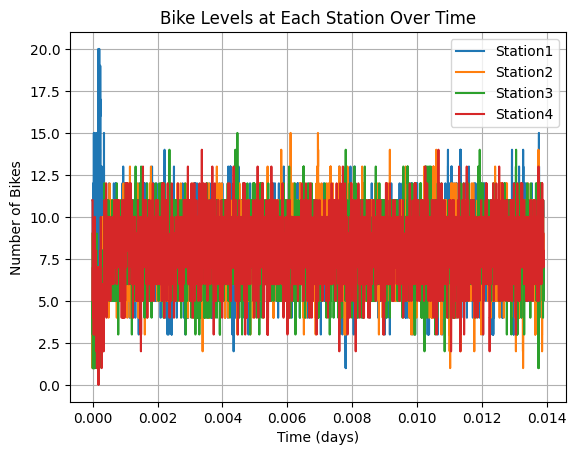

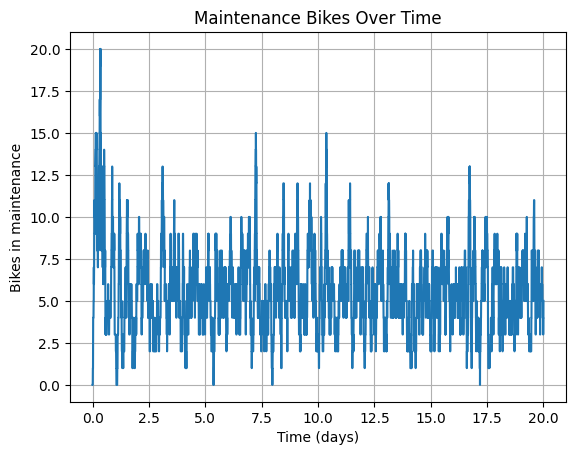

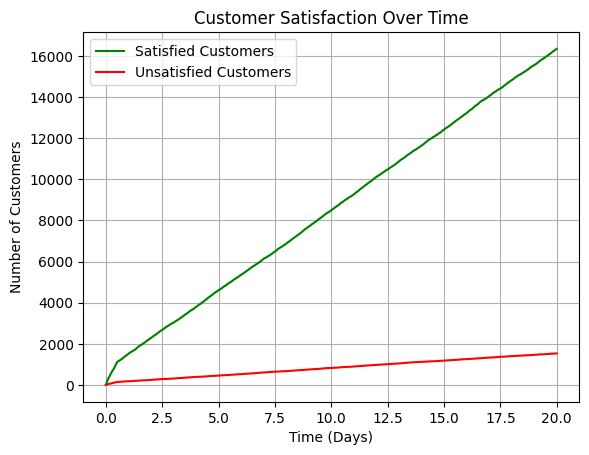

In [ ]:
for station_name, levels in bike_levels.items():
    times, counts = zip(*levels)
    times_days = [t / 1440 for t in times]
    plt.plot(times_days, counts, label=station_name)

plt.xlabel('Time (days)')
plt.ylabel('Number of Bikes')
plt.title('Bike Levels at Each Station Over Time')
plt.legend()
plt.grid(True)
plt.show()


times, counts = zip(*maintenance_levels)
times_days = [t / 1440 for t in times]
plt.plot(times_days, counts)
plt.xlabel('Time (days)')
plt.ylabel('Bikes in maintenance')
plt.title('Maintenance Bikes Over Time')
plt.grid(True)
plt.show()




if unsatisfied_customers and satisfied_customers:  # make sure both lists are not empty
    times_unsat, counts_unsat = zip(*unsatisfied_customers)
    times_sat, counts_sat = zip(*satisfied_customers)
    times_days_unsat = [t / 1440 for t in times_unsat]
    times_days_sat = [t / 1440 for t in times_sat]
    plt.plot(times_days_sat, counts_sat, label='Satisfied Customers', color='green')
    plt.plot(times_days_unsat, counts_unsat, label='Unsatisfied Customers', color='red')

    plt.xlabel('Time (Days)')
    plt.ylabel('Number of Customers')
    plt.title('Customer Satisfaction Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("No customer data to plot yet!")
